In [30]:
import os
from os import listdir

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd


from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#import matplotlib.pyplot 

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

ImportError: cannot import name 'layers' from partially initialized module 'keras' (most likely due to a circular import) (B:\i new\lib\site-packages\keras\__init__.py)

In [44]:
!pip install tensorflow

In [56]:
!pip install keras

In [57]:
import keras

ImportError: cannot import name 'layers' from partially initialized module 'keras' (most likely due to a circular import) (B:\i new\lib\site-packages\keras\__init__.py)

In [90]:
import os
from os import listdir
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense
from keras_preprocessing import image

In [91]:
import pandas as pd
import numpy as np
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import load_model
from keras_preprocessing import image
import random
import scipy
import pylab as pl
from keras_preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [92]:
Train_data_dir=r'IMAGES/train'
validation_data_dir=r'IMAGES/test'

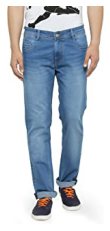

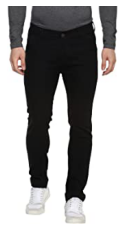

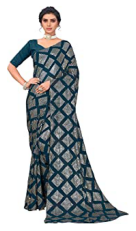

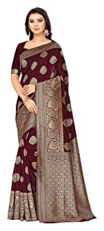

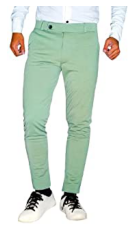

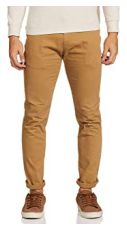

In [93]:
import matplotlib.image as mpimg
Jeans_train=r'IMAGES/train/Jeans (men)'
Saree_train=r'IMAGES/train/Sarees (women)'
Trouser_train=r'IMAGES/train/Trousers (men)'


Dir_train=[Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k=os.listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [94]:
file = os.listdir(r'IMAGES/train')
file

['Jeans (men)', 'Sarees (women)', 'Trousers (men)']

In [95]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=179
nb_validation_samples=20
batch_size=8
epoch=150

In [96]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(Train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 1350 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [99]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 574, 574, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 574, 574, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 287, 287, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 287, 287, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 285, 285, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 285, 285, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 142, 142, 32)     

In [100]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [101]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 2.4911 - acc: 0.3239WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 222s 7s/step - batch: 10.5000 - size: 8.0000 - loss: 2.4911 - acc: 0.3239 - val_loss: 1.0983 - val_acc: 0.3750
Epoch 2/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 1.0815 - acc: 0.4318WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 1.0815 - acc: 0.4318 - val_loss: 1.0983 - val_acc: 0.1875
Epoch 3/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.9775 - acc: 0.4773WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 70s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.9775 - acc: 0.4773 - val_loss: 1.0524 - val_acc: 0.7143
Epoch 4/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.8988 - acc: 0.5511WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.8988 - acc: 0.5511 - val_loss: 1.0385 - val_acc: 0.7500
Epoch 5/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.7444 - acc: 0.6477WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 58s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.7444 - acc: 0.6477 - val_loss: 1.0990 - val_acc: 0.2143
Epoch 6/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.6974 - acc: 0.6477WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.6974 - acc: 0.6477 - val_loss: 0.9799 - val_acc: 0.7500
Epoch 7/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.6547 - acc: 0.6932WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.6547 - acc: 0.6932 - val_loss: 1.0492 - val_acc: 0.5714
Epoch 8/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.6363 - acc: 0.6207WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.6363 - acc: 0.6207 - val_loss: 0.9299 - val_acc: 0.4375
Epoch 9/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.6472 - acc: 0.6420WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 63s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.6472 - acc: 0.6420 - val_loss: 1.0987 - val_acc: 0.1875
Epoch 10/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.6684 - acc: 0.6761WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.6684 - acc: 0.6761 - val_loss: 0.8157 - val_acc: 0.6875
Epoch 11/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5780 - acc: 0.6761WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5780 - acc: 0.6761 - val_loss: 0.9996 - val_acc: 0.9375
Epoch 12/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5404 - acc: 0.7216WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5404 - acc: 0.7216 - val_loss: 0.8958 - val_acc: 0.5000
Epoch 13/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4770 - acc: 0.7500WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4770 - acc: 0.7500 - val_loss: 0.8684 - val_acc: 0.6875
Epoch 14/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5979 - acc: 0.6648WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5979 - acc: 0.6648 - val_loss: 0.7239 - val_acc: 0.9286
Epoch 15/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5557 - acc: 0.7386WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5557 - acc: 0.7386 - val_loss: 0.5351 - val_acc: 0.8125
Epoch 16/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.5253 - acc: 0.6667WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.5255 - acc: 0.6667 - val_loss: 0.8840 - val_acc: 0.5000
Epoch 17/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.6137 - acc: 0.6818WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.6137 - acc: 0.6818 - val_loss: 0.8687 - val_acc: 0.3750
Epoch 18/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5256 - acc: 0.7045WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5256 - acc: 0.7045 - val_loss: 1.0912 - val_acc: 0.3125
Epoch 19/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4922 - acc: 0.7500WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4922 - acc: 0.7500 - val_loss: 0.6370 - val_acc: 0.8750
Epoch 20/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4752 - acc: 0.7330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4752 - acc: 0.7330 - val_loss: 0.5732 - val_acc: 0.8750
Epoch 21/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4789 - acc: 0.7557WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4789 - acc: 0.7557 - val_loss: 0.8576 - val_acc: 0.7143
Epoch 22/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5478 - acc: 0.7784WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5478 - acc: 0.7784 - val_loss: 0.6188 - val_acc: 0.8750
Epoch 23/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5321 - acc: 0.6932WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5321 - acc: 0.6932 - val_loss: 0.6339 - val_acc: 0.9375
Epoch 24/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.5144 - acc: 0.7529WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.5146 - acc: 0.7529 - val_loss: 0.8664 - val_acc: 0.4375
Epoch 25/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4846 - acc: 0.8182WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4846 - acc: 0.8182 - val_loss: 0.3329 - val_acc: 0.9375
Epoch 26/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4951 - acc: 0.7784WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4951 - acc: 0.7784 - val_loss: 0.5729 - val_acc: 0.8750
Epoch 27/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4230 - acc: 0.8011WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4230 - acc: 0.8011 - val_loss: 0.6142 - val_acc: 0.7500
Epoch 28/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5052 - acc: 0.7614WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5052 - acc: 0.7614 - val_loss: 0.8376 - val_acc: 0.5714
Epoch 29/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4693 - acc: 0.7727WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4693 - acc: 0.7727 - val_loss: 0.5658 - val_acc: 0.6875
Epoch 30/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4892 - acc: 0.7330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4892 - acc: 0.7330 - val_loss: 0.4466 - val_acc: 0.8125
Epoch 31/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.5810 - acc: 0.7644WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.5809 - acc: 0.7644 - val_loss: 0.9487 - val_acc: 0.6250
Epoch 32/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4991 - acc: 0.7159WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4991 - acc: 0.7159 - val_loss: 0.8476 - val_acc: 0.5000
Epoch 33/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4821 - acc: 0.7330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4821 - acc: 0.7330 - val_loss: 0.4891 - val_acc: 0.8750
Epoch 34/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4757 - acc: 0.7784WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4757 - acc: 0.7784 - val_loss: 0.4132 - val_acc: 0.7500
Epoch 35/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4695 - acc: 0.7841WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4695 - acc: 0.7841 - val_loss: 0.6310 - val_acc: 0.6250
Epoch 36/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5646 - acc: 0.7102WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5646 - acc: 0.7102 - val_loss: 0.4434 - val_acc: 0.8125
Epoch 37/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4927 - acc: 0.7614WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4927 - acc: 0.7614 - val_loss: 0.8438 - val_acc: 0.6250
Epoch 38/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4074 - acc: 0.7841WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4074 - acc: 0.7841 - val_loss: 0.4925 - val_acc: 0.8125
Epoch 39/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.4339 - acc: 0.8218WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.4339 - acc: 0.8218 - val_loss: 0.5002 - val_acc: 0.8125
Epoch 40/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5300 - acc: 0.7443WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5300 - acc: 0.7443 - val_loss: 0.3964 - val_acc: 0.7500
Epoch 41/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4405 - acc: 0.7898WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4405 - acc: 0.7898 - val_loss: 0.4357 - val_acc: 0.8125
Epoch 42/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5123 - acc: 0.7614WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5123 - acc: 0.7614 - val_loss: 0.5383 - val_acc: 0.8125
Epoch 43/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3975 - acc: 0.7841WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3975 - acc: 0.7841 - val_loss: 0.2830 - val_acc: 0.9375
Epoch 44/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5303 - acc: 0.7727WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5303 - acc: 0.7727 - val_loss: 0.3522 - val_acc: 0.8750
Epoch 45/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4771 - acc: 0.8011WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4771 - acc: 0.8011 - val_loss: 0.6288 - val_acc: 0.8125
Epoch 46/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5398 - acc: 0.7500WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 63s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5398 - acc: 0.7500 - val_loss: 0.4758 - val_acc: 0.8125
Epoch 47/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.4337 - acc: 0.7586WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.4337 - acc: 0.7586 - val_loss: 0.3298 - val_acc: 0.8750
Epoch 48/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4886 - acc: 0.7670WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4886 - acc: 0.7670 - val_loss: 0.4481 - val_acc: 0.8750
Epoch 49/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3522 - acc: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 63s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3522 - acc: 0.8466 - val_loss: 0.2626 - val_acc: 0.9375
Epoch 50/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4871 - acc: 0.7500WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4871 - acc: 0.7500 - val_loss: 0.4733 - val_acc: 0.8750
Epoch 51/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4474 - acc: 0.7898WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 63s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4474 - acc: 0.7898 - val_loss: 0.5368 - val_acc: 0.8125
Epoch 52/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4293 - acc: 0.8011WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4293 - acc: 0.8011 - val_loss: 0.5523 - val_acc: 0.7143
Epoch 53/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4416 - acc: 0.7670WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4416 - acc: 0.7670 - val_loss: 0.3398 - val_acc: 0.8125
Epoch 54/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.3939 - acc: 0.7471WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.3939 - acc: 0.7471 - val_loss: 0.5701 - val_acc: 0.8125
Epoch 55/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4053 - acc: 0.8239WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4053 - acc: 0.8239 - val_loss: 0.6062 - val_acc: 0.6250
Epoch 56/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5342 - acc: 0.7500WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5342 - acc: 0.7500 - val_loss: 0.4115 - val_acc: 0.9375
Epoch 57/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4393 - acc: 0.7784WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4393 - acc: 0.7784 - val_loss: 0.5715 - val_acc: 0.6875
Epoch 58/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5072 - acc: 0.6989WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5072 - acc: 0.6989 - val_loss: 0.3395 - val_acc: 0.8750
Epoch 59/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4071 - acc: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4071 - acc: 0.8125 - val_loss: 0.3595 - val_acc: 0.9375
Epoch 60/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4022 - acc: 0.8295WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4022 - acc: 0.8295 - val_loss: 0.3987 - val_acc: 0.9375
Epoch 61/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3919 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3919 - acc: 0.8068 - val_loss: 0.3899 - val_acc: 0.8571
Epoch 62/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.4366 - acc: 0.7989WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.4366 - acc: 0.7989 - val_loss: 0.2635 - val_acc: 0.8750
Epoch 63/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4367 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4367 - acc: 0.8068 - val_loss: 0.4573 - val_acc: 0.8125
Epoch 64/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4181 - acc: 0.8011WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4181 - acc: 0.8011 - val_loss: 0.5778 - val_acc: 0.7500
Epoch 65/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3231 - acc: 0.8636WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3231 - acc: 0.8636 - val_loss: 0.8477 - val_acc: 0.5625
Epoch 66/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3893 - acc: 0.8182WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3893 - acc: 0.8182 - val_loss: 0.2605 - val_acc: 0.8750
Epoch 67/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3873 - acc: 0.8182WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3873 - acc: 0.8182 - val_loss: 0.5615 - val_acc: 0.7500
Epoch 68/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3768 - acc: 0.7955WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 59s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3768 - acc: 0.7955 - val_loss: 0.2071 - val_acc: 0.9286
Epoch 69/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5296 - acc: 0.8011WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5296 - acc: 0.8011 - val_loss: 0.7611 - val_acc: 0.7500
Epoch 70/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.4265 - acc: 0.8046WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.4265 - acc: 0.8046 - val_loss: 0.3951 - val_acc: 0.8750
Epoch 71/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4042 - acc: 0.8239WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 63s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4042 - acc: 0.8239 - val_loss: 0.2911 - val_acc: 0.8750
Epoch 72/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3792 - acc: 0.8239WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3792 - acc: 0.8239 - val_loss: 0.5471 - val_acc: 0.6250
Epoch 73/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4178 - acc: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4178 - acc: 0.8125 - val_loss: 0.3605 - val_acc: 0.9375
Epoch 74/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4120 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4120 - acc: 0.8068 - val_loss: 0.3704 - val_acc: 0.8125
Epoch 75/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3306 - acc: 0.8295WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 69s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3306 - acc: 0.8295 - val_loss: 0.4507 - val_acc: 0.7143
Epoch 76/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3785 - acc: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 72s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3785 - acc: 0.8466 - val_loss: 0.3679 - val_acc: 0.8750
Epoch 77/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.3569 - acc: 0.8276WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.3569 - acc: 0.8276 - val_loss: 0.7372 - val_acc: 0.5000
Epoch 78/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3493 - acc: 0.8920WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 69s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3493 - acc: 0.8920 - val_loss: 0.6710 - val_acc: 0.6250
Epoch 79/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3486 - acc: 0.8409WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 69s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3486 - acc: 0.8409 - val_loss: 0.2713 - val_acc: 0.8750
Epoch 80/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3904 - acc: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3904 - acc: 0.8466 - val_loss: 0.4012 - val_acc: 0.7500
Epoch 81/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4144 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4144 - acc: 0.8068 - val_loss: 0.5492 - val_acc: 0.6875
Epoch 82/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4521 - acc: 0.7557WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4521 - acc: 0.7557 - val_loss: 0.4736 - val_acc: 0.7857
Epoch 83/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3876 - acc: 0.8466WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3876 - acc: 0.8466 - val_loss: 0.1831 - val_acc: 0.9375
Epoch 84/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3392 - acc: 0.8580WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3392 - acc: 0.8580 - val_loss: 0.5271 - val_acc: 0.7857
Epoch 85/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.3294 - acc: 0.8678WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.3292 - acc: 0.8678 - val_loss: 0.3151 - val_acc: 0.9375
Epoch 86/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4166 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4166 - acc: 0.8068 - val_loss: 0.2422 - val_acc: 0.9286
Epoch 87/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4322 - acc: 0.7841WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4322 - acc: 0.7841 - val_loss: 0.3662 - val_acc: 0.8750
Epoch 88/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.5411 - acc: 0.7273WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.5411 - acc: 0.7273 - val_loss: 0.4475 - val_acc: 0.5714
Epoch 89/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4746 - acc: 0.7102WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4746 - acc: 0.7102 - val_loss: 0.3954 - val_acc: 0.8750
Epoch 90/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4701 - acc: 0.7727WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4701 - acc: 0.7727 - val_loss: 0.7294 - val_acc: 0.6250
Epoch 91/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3236 - acc: 0.8750WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 68s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3236 - acc: 0.8750 - val_loss: 0.2346 - val_acc: 0.8750
Epoch 92/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3486 - acc: 0.8295WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3486 - acc: 0.8295 - val_loss: 0.2343 - val_acc: 0.9375
Epoch 93/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.4259 - acc: 0.8161WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.4260 - acc: 0.8161 - val_loss: 0.6255 - val_acc: 0.7500
Epoch 94/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4608 - acc: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4608 - acc: 0.8125 - val_loss: 0.2480 - val_acc: 0.9375
Epoch 95/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3380 - acc: 0.8580WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3380 - acc: 0.8580 - val_loss: 0.2222 - val_acc: 0.8750
Epoch 96/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4799 - acc: 0.7330WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4799 - acc: 0.7330 - val_loss: 0.3907 - val_acc: 0.9375
Epoch 97/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3771 - acc: 0.8523WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3771 - acc: 0.8523 - val_loss: 0.5182 - val_acc: 0.6250
Epoch 98/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3455 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3455 - acc: 0.8068 - val_loss: 0.3059 - val_acc: 0.8125
Epoch 99/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3396 - acc: 0.8523WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 64s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3396 - acc: 0.8523 - val_loss: 0.2785 - val_acc: 0.9286
Epoch 100/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.4012 - acc: 0.8218WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.4011 - acc: 0.8218 - val_loss: 0.3920 - val_acc: 0.6875
Epoch 101/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3702 - acc: 0.8523WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 59s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3702 - acc: 0.8523 - val_loss: 0.2948 - val_acc: 1.0000
Epoch 102/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3337 - acc: 0.8750WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3337 - acc: 0.8750 - val_loss: 0.8250 - val_acc: 0.4375
Epoch 103/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3843 - acc: 0.8295WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3843 - acc: 0.8295 - val_loss: 0.6169 - val_acc: 0.7500
Epoch 104/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3962 - acc: 0.7955WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 63s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3962 - acc: 0.7955 - val_loss: 0.2861 - val_acc: 0.8750
Epoch 105/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4107 - acc: 0.8011WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4107 - acc: 0.8011 - val_loss: 0.2905 - val_acc: 0.8750
Epoch 106/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3790 - acc: 0.8068WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 61s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3790 - acc: 0.8068 - val_loss: 0.2789 - val_acc: 0.8750
Epoch 107/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4147 - acc: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 62s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4147 - acc: 0.8125 - val_loss: 0.6513 - val_acc: 0.6250
Epoch 108/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 7.9091 - loss: 0.3843 - acc: 0.8506WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 7.9091 - loss: 0.3842 - acc: 0.8506 - val_loss: 0.4449 - val_acc: 0.7500
Epoch 109/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3969 - acc: 0.7670WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 65s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3969 - acc: 0.7670 - val_loss: 0.4695 - val_acc: 0.8125
Epoch 110/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.2986 - acc: 0.8693WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.2986 - acc: 0.8693 - val_loss: 0.4656 - val_acc: 0.6429
Epoch 111/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3498 - acc: 0.8523WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 60s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3498 - acc: 0.8523 - val_loss: 0.5254 - val_acc: 0.5625
Epoch 112/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.4038 - acc: 0.8125WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 66s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.4038 - acc: 0.8125 - val_loss: 0.2981 - val_acc: 0.9375
Epoch 113/150
22/22 [==============================] - ETA: 0s - batch: 10.5000 - size: 8.0000 - loss: 0.3988 - acc: 0.8523WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


22/22 [==============================] - 67s 3s/step - batch: 10.5000 - size: 8.0000 - loss: 0.3988 - acc: 0.8523 - val_loss: 0.2795 - val_acc: 0.9375
Epoch 113: early stopping


In [102]:
# Model Evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

Test Loss 0.15634632110595703
Test Accuracy 0.875


In [103]:
model.save('img_model.h5')

In [106]:
from tensorflow.python.keras.models import load_model
model = load_model('img_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Input Image is: img451.jpeg


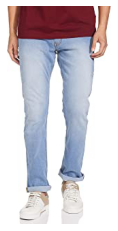

Predicted Label is: trouser

Input Image is: img452.jpeg


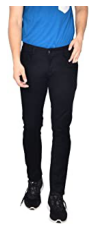

Predicted Label is: jeans

Input Image is: img453.jpeg


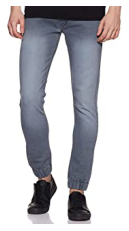

Predicted Label is: trouser

Input Image is: img454.jpeg


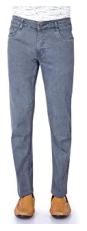

Predicted Label is: trouser

Input Image is: img455.jpeg


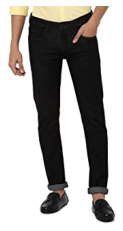

Predicted Label is: trouser

Input Image is: img456.jpeg


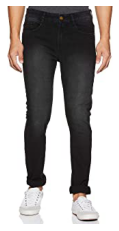

Predicted Label is: trouser

Input Image is: img457.jpeg


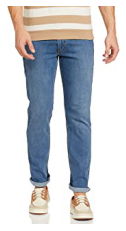

Predicted Label is: trouser

Input Image is: img458.jpeg


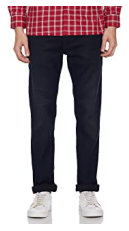

Predicted Label is: jeans

Input Image is: img459.jpeg


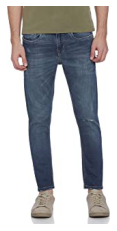

Predicted Label is: trouser

Input Image is: img460.jpeg


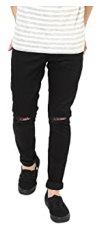

Predicted Label is: sarees

Input Image is: img461.jpeg


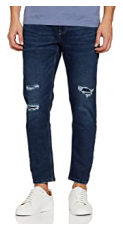

Predicted Label is: trouser

Input Image is: img462.jpeg


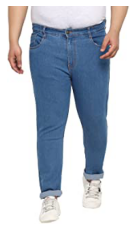

Predicted Label is: trouser

Input Image is: img463.jpeg


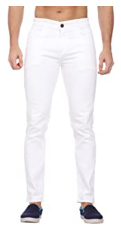

Predicted Label is: sarees

Input Image is: img464.jpeg


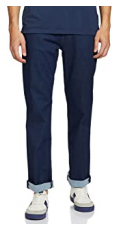

Predicted Label is: trouser

Input Image is: img465.jpeg


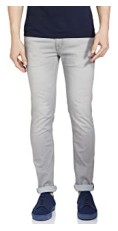

Predicted Label is: trouser

Input Image is: img466.jpeg


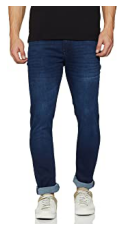

Predicted Label is: trouser

Input Image is: img467.jpeg


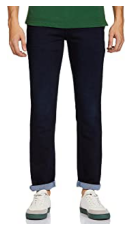

Predicted Label is: jeans

Input Image is: img468.jpeg


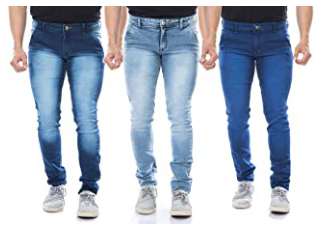

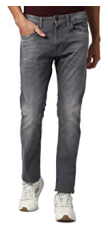

Predicted Label is: trouser

Input Image is: img469.jpeg
Predicted Label is: trouser

Input Image is: img470.jpeg


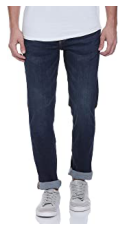

Predicted Label is: trouser

Input Image is: img471.jpeg


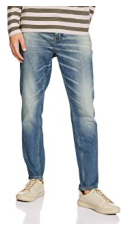

Predicted Label is: trouser

Input Image is: img472.jpeg


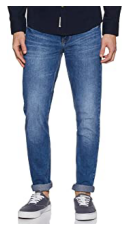

Predicted Label is: jeans

Input Image is: img473.jpeg


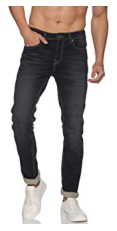

Predicted Label is: trouser

Input Image is: img474.jpeg


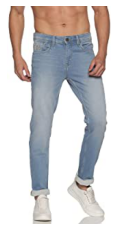

Predicted Label is: trouser

Input Image is: img475.jpeg


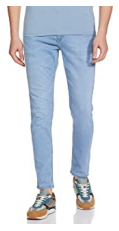

Predicted Label is: trouser

Input Image is: img476.jpeg


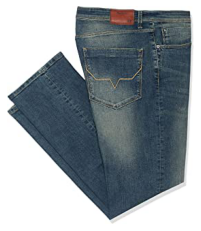

Predicted Label is: trouser

Input Image is: img477.jpeg


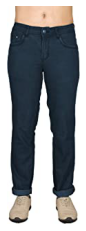

Predicted Label is: trouser

Input Image is: img478.jpeg


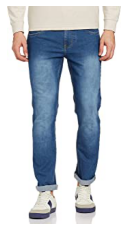

Predicted Label is: trouser

Input Image is: img479.jpeg


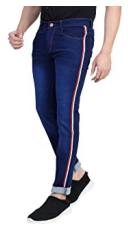

Predicted Label is: trouser

Input Image is: img480.jpeg


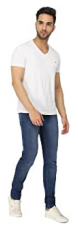

Predicted Label is: sarees

Input Image is: img481.jpeg


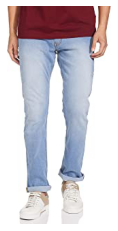

Predicted Label is: trouser

Input Image is: img482.jpeg


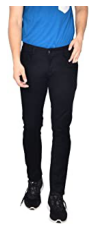

Predicted Label is: jeans

Input Image is: img483.jpeg


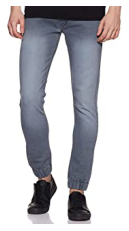

Predicted Label is: trouser

Input Image is: img484.jpeg


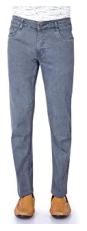

Predicted Label is: trouser

Input Image is: img485.jpeg


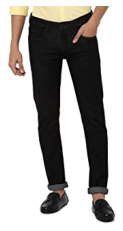

Predicted Label is: trouser

Input Image is: img486.jpeg


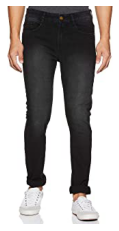

Predicted Label is: trouser

Input Image is: img487.jpeg


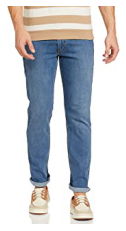

Predicted Label is: trouser

Input Image is: img488.jpeg


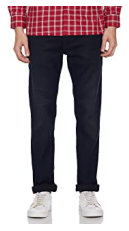

Predicted Label is: jeans

Input Image is: img489.jpeg


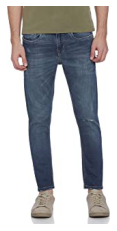

Predicted Label is: trouser

Input Image is: img490.jpeg


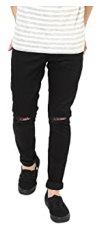

Predicted Label is: sarees

Input Image is: img491.jpeg


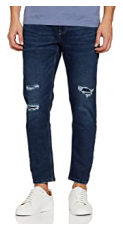

Predicted Label is: trouser

Input Image is: img492.jpeg


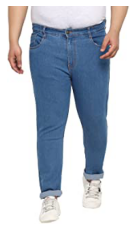

Predicted Label is: trouser

Input Image is: img493.jpeg


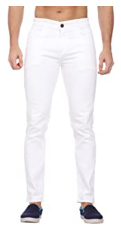

Predicted Label is: sarees

Input Image is: img494.jpeg


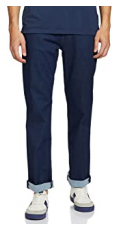

Predicted Label is: trouser

Input Image is: img495.jpeg


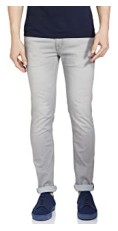

Predicted Label is: trouser

Input Image is: img496.jpeg


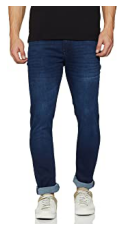

Predicted Label is: trouser

Input Image is: img497.jpeg


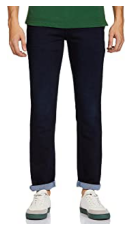

Predicted Label is: jeans

Input Image is: img498.jpeg


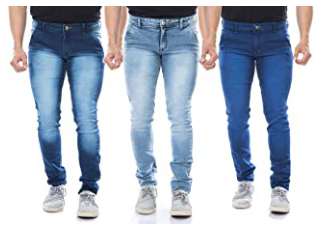

Predicted Label is: trouser

Input Image is: img499.jpeg


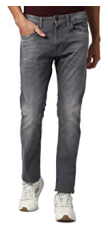

Predicted Label is: trouser

Input Image is: img500.jpeg


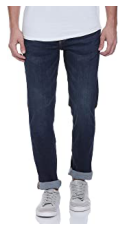

Predicted Label is: trouser

Input Image is: img451.jpeg


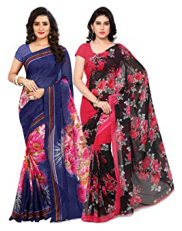

Predicted Label is: sarees

Input Image is: img452.jpeg


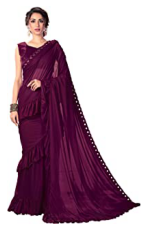

Predicted Label is: sarees

Input Image is: img453.jpeg


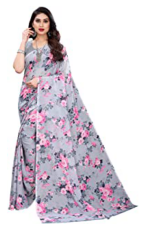

Predicted Label is: sarees

Input Image is: img454.jpeg


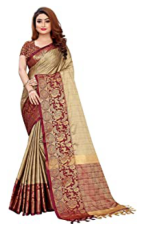

Predicted Label is: sarees

Input Image is: img455.jpeg


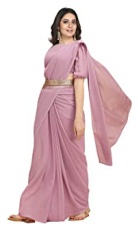

Predicted Label is: sarees

Input Image is: img456.jpeg


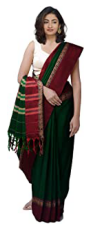

Predicted Label is: sarees

Input Image is: img457.jpeg


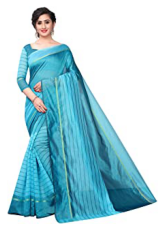

Predicted Label is: sarees

Input Image is: img458.jpeg


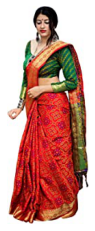

Predicted Label is: sarees

Input Image is: img459.jpeg


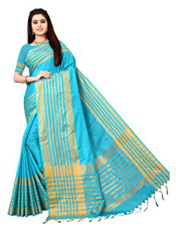

Predicted Label is: sarees

Input Image is: img460.jpeg


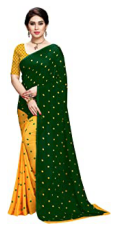

Predicted Label is: sarees

Input Image is: img461.jpeg


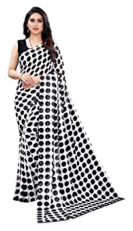

Predicted Label is: sarees

Input Image is: img462.jpeg


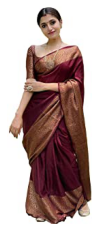

Predicted Label is: sarees

Input Image is: img463.jpeg


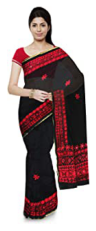

Predicted Label is: sarees

Input Image is: img464.jpeg


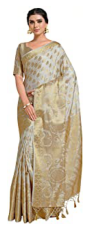

Predicted Label is: sarees

Input Image is: img465.jpeg


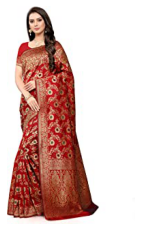

Predicted Label is: sarees

Input Image is: img466.jpeg


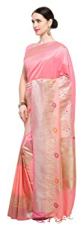

Predicted Label is: sarees

Input Image is: img467.jpeg


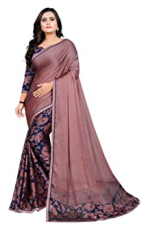

Predicted Label is: sarees

Input Image is: img468.jpeg


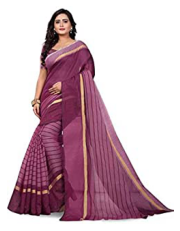

Predicted Label is: sarees

Input Image is: img469.jpeg


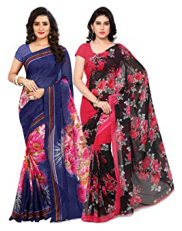

Predicted Label is: sarees

Input Image is: img470.jpeg


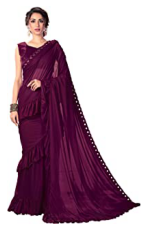

Predicted Label is: sarees

Input Image is: img471.jpeg


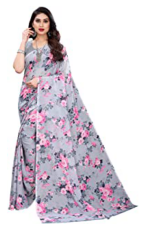

Predicted Label is: sarees

Input Image is: img472.jpeg


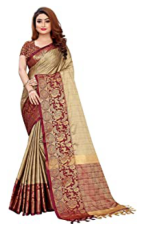

Predicted Label is: sarees

Input Image is: img473.jpeg


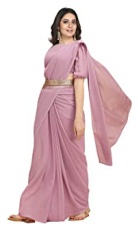

Predicted Label is: sarees

Input Image is: img474.jpeg


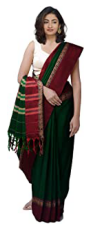

Predicted Label is: sarees

Input Image is: img475.jpeg


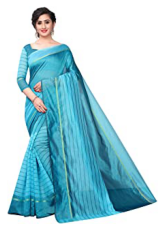

Predicted Label is: sarees

Input Image is: img476.jpeg


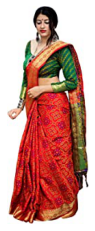

Predicted Label is: sarees

Input Image is: img477.jpeg


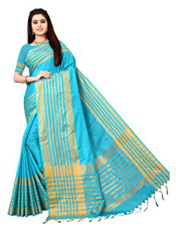

Predicted Label is: sarees

Input Image is: img478.jpeg


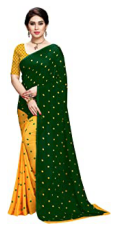

Predicted Label is: sarees

Input Image is: img479.jpeg


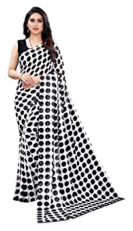

Predicted Label is: sarees

Input Image is: img480.jpeg


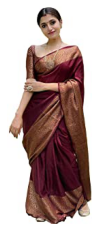

Predicted Label is: sarees

Input Image is: img481.jpeg


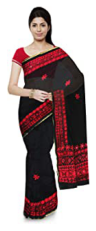

Predicted Label is: sarees

Input Image is: img482.jpeg


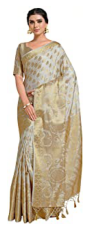

Predicted Label is: sarees

Input Image is: img483.jpeg


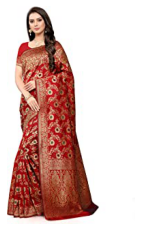

Predicted Label is: sarees

Input Image is: img484.jpeg


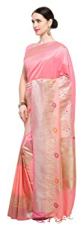

Predicted Label is: sarees

Input Image is: img485.jpeg


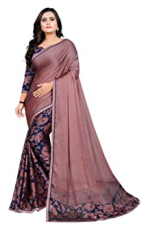

Predicted Label is: sarees

Input Image is: img486.jpeg


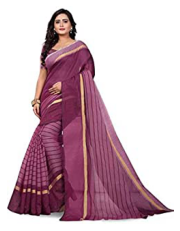

Predicted Label is: sarees

Input Image is: img487.jpeg


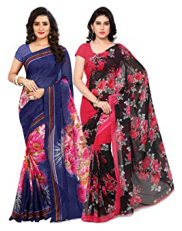

Predicted Label is: sarees

Input Image is: img488.jpeg


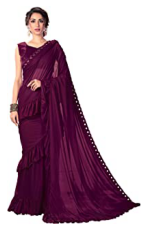

Predicted Label is: sarees

Input Image is: img489.jpeg


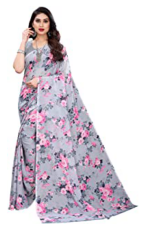

Predicted Label is: sarees

Input Image is: img490.jpeg


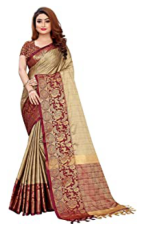

Predicted Label is: sarees

Input Image is: img491.jpeg


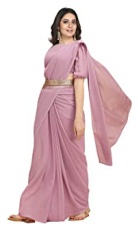

Predicted Label is: sarees

Input Image is: img492.jpeg


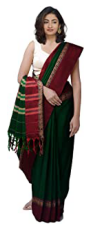

Predicted Label is: sarees

Input Image is: img493.jpeg


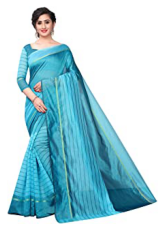

Predicted Label is: sarees

Input Image is: img494.jpeg


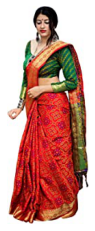

Predicted Label is: sarees

Input Image is: img495.jpeg


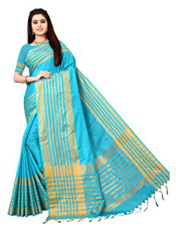

Predicted Label is: sarees

Input Image is: img496.jpeg


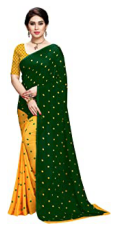

Predicted Label is: sarees

Input Image is: img497.jpeg


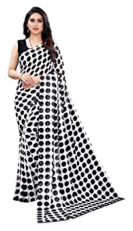

Predicted Label is: sarees

Input Image is: img498.jpeg


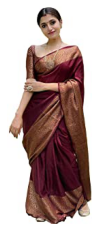

Predicted Label is: sarees

Input Image is: img499.jpeg


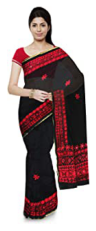

Predicted Label is: sarees

Input Image is: img500.jpeg


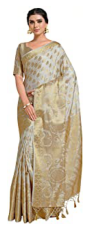

Predicted Label is: sarees

Input Image is: img451.jpeg


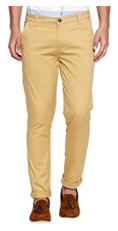

Predicted Label is: trouser

Input Image is: img452.jpeg


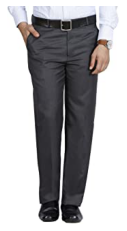

Predicted Label is: trouser

Input Image is: img453.jpeg


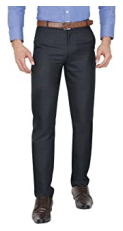

Predicted Label is: trouser

Input Image is: img454.jpeg


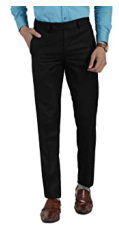

Predicted Label is: trouser

Input Image is: img455.jpeg


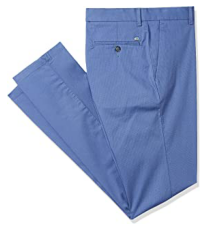

Predicted Label is: trouser

Input Image is: img456.jpeg


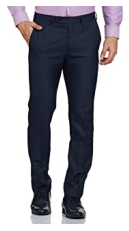

Predicted Label is: trouser

Input Image is: img457.jpeg


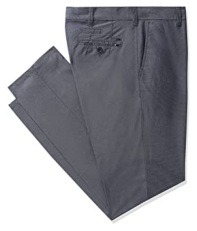

Predicted Label is: trouser

Input Image is: img458.jpeg


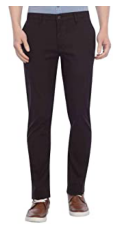

Predicted Label is: trouser

Input Image is: img459.jpeg


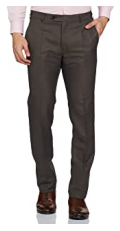

Predicted Label is: trouser

Input Image is: img460.jpeg


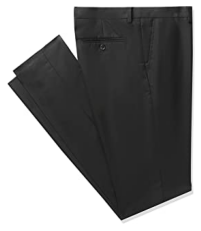

Predicted Label is: trouser

Input Image is: img461.jpeg


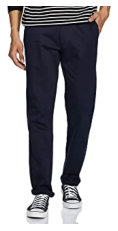

Predicted Label is: trouser

Input Image is: img462.jpeg


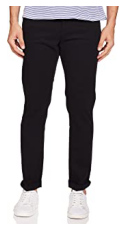

Predicted Label is: trouser

Input Image is: img463.jpeg


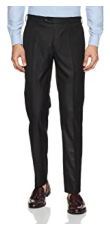

Predicted Label is: trouser

Input Image is: img464.jpeg


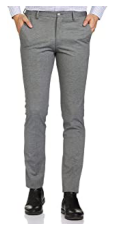

Predicted Label is: trouser

Input Image is: img465.jpeg


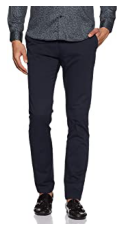

Predicted Label is: trouser

Input Image is: img466.jpeg


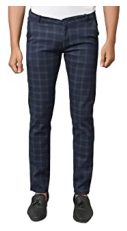

Predicted Label is: trouser

Input Image is: img467.jpeg


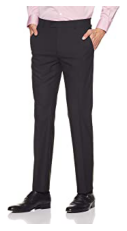

Predicted Label is: trouser

Input Image is: img468.jpeg


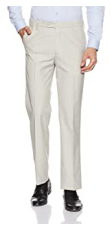

Predicted Label is: sarees

Input Image is: img469.jpeg


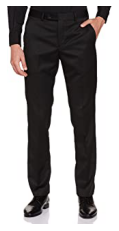

Predicted Label is: trouser

Input Image is: img470.jpeg


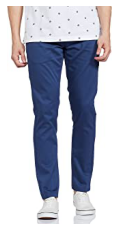

Predicted Label is: trouser

Input Image is: img471.jpeg


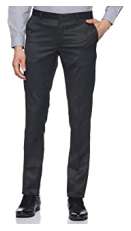

Predicted Label is: trouser

Input Image is: img472.jpeg


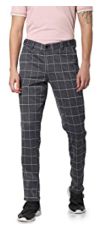

Predicted Label is: trouser

Input Image is: img473.jpeg


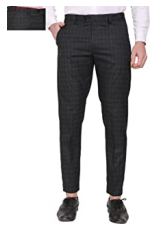

Predicted Label is: trouser

Input Image is: img474.jpeg


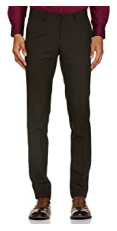

Predicted Label is: trouser

Input Image is: img475.jpeg


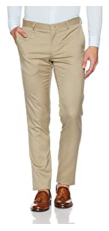

Predicted Label is: trouser

Input Image is: img476.jpeg


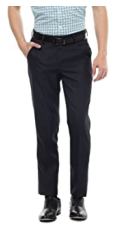

Predicted Label is: trouser

Input Image is: img477.jpeg


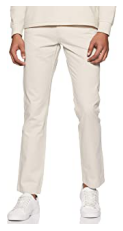

Predicted Label is: trouser

Input Image is: img478.jpeg


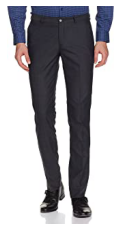

Predicted Label is: trouser

Input Image is: img479.jpeg


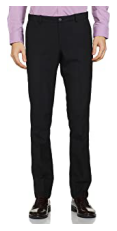

Predicted Label is: trouser

Input Image is: img480.jpeg


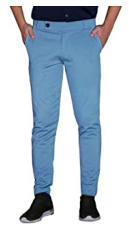

Predicted Label is: trouser

Input Image is: img481.jpeg


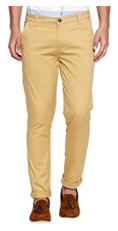

Predicted Label is: trouser

Input Image is: img482.jpeg


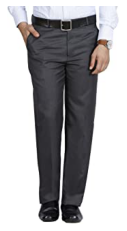

Predicted Label is: trouser

Input Image is: img483.jpeg


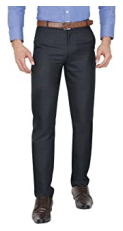

Predicted Label is: trouser

Input Image is: img484.jpeg


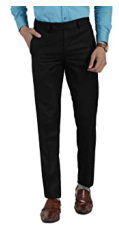

Predicted Label is: trouser

Input Image is: img485.jpeg


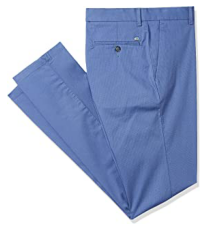

Predicted Label is: trouser

Input Image is: img486.jpeg


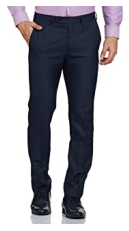

Predicted Label is: trouser

Input Image is: img487.jpeg


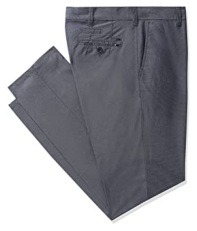

Predicted Label is: trouser

Input Image is: img488.jpeg


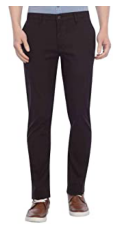

Predicted Label is: trouser

Input Image is: img489.jpeg


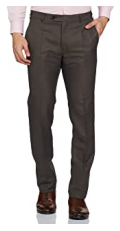

Predicted Label is: trouser

Input Image is: img490.jpeg


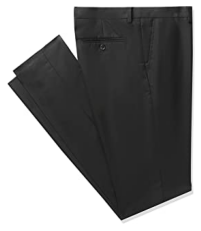

Predicted Label is: trouser

Input Image is: img491.jpeg


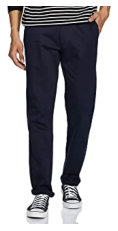

Predicted Label is: trouser

Input Image is: img492.jpeg


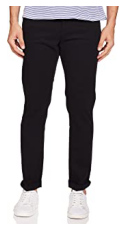

Predicted Label is: trouser

Input Image is: img493.jpeg


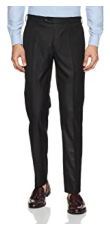

Predicted Label is: trouser

Input Image is: img494.jpeg


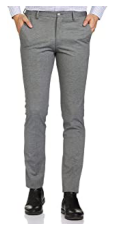

Predicted Label is: trouser

Input Image is: img495.jpeg


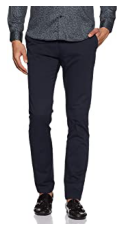

Predicted Label is: trouser

Input Image is: img496.jpeg


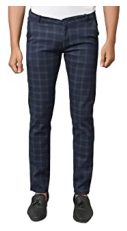

Predicted Label is: trouser

Input Image is: img497.jpeg


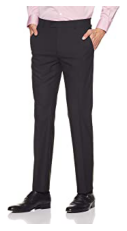

Predicted Label is: trouser

Input Image is: img498.jpeg


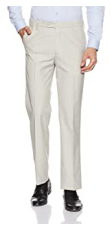

Predicted Label is: sarees

Input Image is: img499.jpeg


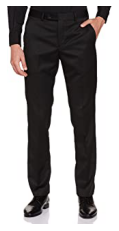

Predicted Label is: trouser

Input Image is: img500.jpeg


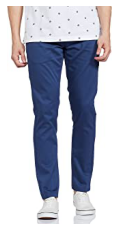

Predicted Label is: trouser



In [107]:
#Predicted samples of the test images
test_jeans=r"IMAGES/Test/Jeans (men)"
test_Saree=r"IMAGES/Test/Sarees (women)"
test_trouser=r"IMAGES/Test/Trousers (men)"

from os import listdir
Predicted_class=[]
classes=[test_jeans,test_Saree,test_trouser]
for test_dir in classes:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(576, 576))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Predicted Label is: jeans\n")
            Predicted_class.append("Jeans (men)")
        elif final==1:
            print("Predicted Label is: sarees\n")
            Predicted_class.append("Sarees (women)")
        elif final==2:
            print("Predicted Label is: trouser\n")
            Predicted_class.append("Trousers (men)")